In [1]:
import os
import cv2
import torch
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
os.chdir('F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\yolov5/')

detection_model = torch.hub.load('.', 'custom', path='F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3/best.pt', source='local')

# recognition_model = torch.hub.load('.', 'custom', path=r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\model10_kaaf/best.pt', source='local')

recognition_model = torch.hub.load('.', 'custom', path=r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\model9/best.pt', source='local')

# recognition_model = torch.hub.load('.', 'custom', path=r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\recognition_model/best.pt', source='local')

YOLOv5  2023-9-24 Python-3.11.3 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
YOLOv5  2023-9-24 Python-3.11.3 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 


In [3]:
images = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images/'
cropped_img_dir = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\yolov5\runs\detect'
exp_path = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\yolov5\runs\detect\exp'
saved_img_dir = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\saved_images'
resized_img_dir = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\resized_images'

In [4]:
def delete_folder_or_file(path):
    try:
        if os.path.exists(path):
            folder_path = path.split("\\")
            if "exp" in folder_path:
                shutil.rmtree(path)
            else:
                for img in os.listdir(path):
                    img_path = os.path.join(path, img)
                    # Use os.remove() to delete the file
                    os.remove(img_path)
            return "Deletion completed successfully"
        else:
            return "Path does not exist"
    except FileNotFoundError as e:
        return f"Error occurred while deleting the file/folder: {e}"

In [5]:
def apply_detection_model_and_save_results(model, images_path):
    for img in os.listdir(images):
        try:
            img_path = os.path.join(images_path, img)
            result = model(img_path)
            accuracy = result.xyxyn[0][:, -2].cpu().numpy()[0]
            if accuracy > 0.8:
                crops = result.crop(save=True)
            else:
                return 
        except (OSError, cv2.error) as e:
            print(f"Error processing image {img}: {e}")
            continue

In [6]:
def apply_detection_model_and_save_results(model, images_path):
    for img in os.listdir(images):
        try:
            img_path = os.path.join(images_path, img)
            result = model(img_path)
#             accuracy = result.xyxyn[0][:, -2].cpu().numpy()[0]
            crops = result.crop(save=True)
        except (OSError, cv2.error) as e:
            print(f"Error processing image {img}: {e}")
            continue

In [7]:
# images_path = r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images"

In [8]:
# x = apply_detection_model_and_save_results(detection_model, images_path)

Saved 1 image to runs\detect\exp2
Saved results to runs\detect\exp2



In [61]:
# for img in os.listdir(images):
#     img_path = os.path.join(images_path, img)
#     result = detection_model(img_path)
#     #accuracy = result.xyxyn[0][:, -2].cpu().numpy()[0]
#     crops = result.crop(save=True)

Saved 1 image to runs\detect\exp13
Saved results to runs\detect\exp13



In [63]:
# img_path = os.path.join(images_path, img)
# result = detection_model(img_path)
# accuracy = result.xyxyn[0][:, -2].cpu().numpy()[0]
# print(accuracy)
# if accuracy > 0.9:
#     crops = result.crop(save=True)

0.9566568


In [72]:
# img_path = os.path.join(images_path, img)
# result = detection_model(img_path)
# accuracies = result.xyxyn[0][:, -2].cpu().numpy()

# for accuracy in accuracies:
#     if accuracy > 0.9:
#         crops = result.crop(save=True)
#         print(f"Accuracy: {accuracy:.2f}")

Saved 1 image to runs\detect\exp16
Saved results to runs\detect\exp16



Accuracy: 0.96


In [99]:
# labels = results.xyxyn[0][:, :-1].cpu().numpy()

In [100]:
# reversed_labels = labels[::-1]
# reversed_labels 

array([[    0.29841,     0.37535,     0.32384,     0.40807,       0.313],
       [    0.50651,     0.70212,     0.59031,     0.78725,     0.95666]], dtype=float32)

In [84]:
# image_path = r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg"

In [86]:
# results = detection_model(image_path)
# # Get the class names associated with the model
# # Get the predicted labels and bounding box coordinates
# labels = results.xyxyn[0][:, -1].cpu().numpy()
# boxes = results.xyxyn[0][:, :-1].cpu().numpy()

# class_names = detection_model.module.names if hasattr(detection_model, 'module') else detection_model.names

# # Reverse the order of labels and bounding boxes
# reversed_labels = labels[::-1]
# reversed_boxes = boxes[::-1]

In [87]:
# reversed_labels

array([          0,           0], dtype=float32)

In [88]:
# reversed_boxes

array([[    0.29841,     0.37535,     0.32384,     0.40807,       0.313],
       [    0.50651,     0.70212,     0.59031,     0.78725,     0.95666]], dtype=float32)

In [67]:
# accuracies

array([    0.95666,       0.313], dtype=float32)

In [7]:
def save_cropped_img(cropped_img_dir, saved_img_dir):
    for filename in os.listdir(cropped_img_dir):
        for crops in os.listdir(os.path.join(cropped_img_dir, filename)):
            if crops == "crops":
                for plate in os.listdir(os.path.join(cropped_img_dir, filename, crops)):
                    for img in os.listdir(os.path.join(cropped_img_dir, filename, crops, plate)):
                        img_path = os.path.join(cropped_img_dir, filename, crops, plate, img)
                        image = cv2.imread(img_path)
                        cv2.imwrite(saved_img_dir + "//" + img, image)
    return

In [8]:
def resize_img(saved_img_dir, resized_img_dir):
    # Create the output folder if it doesn't exist
    os.makedirs(resized_img_dir, exist_ok=True)
    # Iterate over the files in the input folder
    for filename in os.listdir(saved_img_dir):
        input_path = os.path.join(saved_img_dir, filename)
        output_path = os.path.join(resized_img_dir, filename)

        # Check if the file is an image
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            # Read the image
            image = cv2.imread(input_path)

            # Check if the image was successfully read
            if image is not None:
                ratio = 600 / image.shape[1]
                width = round(image.shape[1] * ratio)
                height = round(image.shape[0] * ratio)

                # Resize the image
                resized_image = cv2.resize(image, (width, height))

                # Save the resized image to the output folder
                cv2.imwrite(output_path, resized_image)
                # print(f"Resized image saved: {output_path}")
            else:
                print(f"Failed to read image: {input_path}")
        else:
            print(f"Skipping non-image file: {input_path}")

In [9]:
def reverse_labels_and_boxes(img_path):
    for img in os.listdir(img_path):
        image_path = img_path + "\\" + img
    results = recognition_model(image_path)

    # Get the predicted labels and bounding box coordinates
    labels = results.xyxyn[0][:, -1].cpu().numpy()
    boxes = results.xyxyn[0][:, :-1].cpu().numpy()

    # Get the class names associated with the model
    class_names = recognition_model.module.names if hasattr(recognition_model, 'module') else recognition_model.names

    # Reverse the order of labels and bounding boxes
    reversed_labels = labels[::-1]
    reversed_boxes = boxes[::-1]
    return reversed_labels, reversed_boxes, class_names

In [10]:
def return_model_result(reversed_labels, reversed_boxes, class_names):        
        # Initialize an empty dictionary to store the results
        model_result = {}

        # Iterate over the reversed bounding box coordinates and labels
        for label, box in zip(reversed_labels, reversed_boxes):
            # Get the label name using the model's class names
            label_name = class_names[int(label)]

            # Check if the label name already exists in the dictionary
            if label_name in model_result:
                # If the label name exists, append the bounding box to the existing list
                model_result[label_name].append(box[0])
            else:
                # If the label name doesn't exist, create a new list with the bounding box
                model_result[label_name] = [box[0]]

        # Print the model_result dictionary
        return model_result

In [11]:
def return_sorted_plate_characters(reversed_labels, reversed_boxes,class_names, model_result):
    lst = []
    for label, box in zip(reversed_labels, reversed_boxes):
        # Get the label name using the model's class names
        label_name = class_names[int(label)]

        lst.append(box[0])

    lst.sort()  # Sort the list of bounding boxes in ascending order

    # Initialize an empty list to store the matching keys
    matching_keys = []

    # Iterate over the elements in lst
    for item in lst:
        found_match = False
        for key, value in model_result.items():
            if np.allclose(value, item):
                matching_keys.append(key)
                found_match = True
                break
        if not found_match:
            # Check if the item matches any array value element-wise
            for key, value in model_result.items():
                if any(np.allclose(v, item) for v in value):
                    matching_keys.append(key)
                    break

    # return the matching keys
    return matching_keys

In [12]:
replace_arabic_characters_and_digits = {"zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9,
                                        "alif":"أ", "baa":"ب", "geem":"ج", "daal":"د", "raa":"ر", "seen":"س", "saad":"ص", "taa":"ط",
                                        "ein":"ع", "faa":"ف", "qaaf":"ق","kaaf":"ك", "laam":"ل", "meem":"م", "noon":"ن", "haa":"ه", "waaw":"و", "yaa":"ي"}

In [13]:
def convert_plate_characters(matching_keys):
    # Initialize an empty list to store the corresponding values
    matching_values = []

    # Iterate over the keys in matching_keys
    for key in matching_keys:
        if key in replace_arabic_characters_and_digits:
            value = replace_arabic_characters_and_digits[key]
            matching_values.append(value)

    # Print the matching values
    return matching_values

In [14]:
def join_digits_and_sort_characters(matching_values):
    numbers = ''
    characters = ''

    for item in matching_values:
        if isinstance(item, int):
            numbers += str(item)
        elif isinstance(item, str):
            characters += item
            separated_characters = list(characters[::-1])

    result_list = [numbers, separated_characters]
    return result_list

In [15]:
def join_digits_and_sort_characters(matching_values):
    numbers = ""
    characters = ""
    for item in matching_values:
        item_str = str(item)  # Convert item to string
        if item_str.isdigit():
            numbers += item_str
        else:
            characters += item_str
    separated_characters = list(characters[::-1])
    result_list = [numbers, separated_characters]
    return result_list

In [15]:
# def join_digits_and_sort_characters(matching_values):
#     numbers = ""
#     characters = ""
#     for item in matching_values:
#         if item.isdigit():
#             numbers += item
#         else:
#             characters += item
#     separated_characters = list(characters[::-1])
#     result_list = [numbers, separated_characters]
#     return result_list

In [39]:
# def join_digits_and_sort_characters(matching_values):
#     numbers = ""
#     characters = ""
#     for item in matching_values:
#         item_str = str(item)  # Convert item to string
#         if item_str.isdigit():
#             numbers += item_str
#         else:
#             characters += item_str
#     separated_characters = list(characters[::-1])
#     result_list = [numbers, separated_characters]
#     return result_list

In [16]:
def get_governorate(result_list):
    replace_first_element = {"س": "الإسكندرية", "ر": "الشرقية", "د": "الدقهلية", "م": "المنوفية", "ب": "البحيرة",
                             "ل": "كفر الشيخ", "ع": "الغربية", "ق": "القليوبية", "ف": "الفيوم", "و": "بني سويف",
                             "ن": "المنيا", "ي": "أسيوط", "ه": "سوهاج", "أ": "القاهرة"}

    replace_second_element_if_first_geem = {"ه": "مطروح", "ب": "الوادي الجديد"}

    replace_second_element_if_first_saad = {"أ": "قنا", "ق": "الأقصر", "و": "أسوان"}

    replace_second_element_if_first_taa = {"س": "السويس", "ن": "الاسماعيلية","ص": "الاسماعيلية", "ب": "بورسعيد","ع": "بورسعيد", "د": "دمياط",
                                           "أ": "شمال سيناء", "ج": "جنوب سيناء", "ر": "البحر الأحمر"}
    
    if len(result_list[0]) == 6 and len(result_list[1]) == 1:
            value = "شرطة"
    elif len(result_list[1]) >= 2:
        first_char = result_list[1][0]
        sec_char = result_list[1][1]
        if len(result_list[0]) == 3 and len(result_list[1]) == 3:
            value = "القاهرة"
        elif len(result_list[0]) == 4 and len(result_list[1]) == 2:
            value = "الجيزة"
        elif len(result_list[0]) == 4 and len(result_list[1]) == 3:
            if first_char == "ج":
                value = replace_second_element_if_first_geem.get(sec_char, "أخرى")
            elif first_char == "ص":
                value = replace_second_element_if_first_saad.get(sec_char, "أخرى")
            elif first_char == "ط":
                value = replace_second_element_if_first_taa.get(sec_char, "أخرى")
            else:
                value = replace_first_element.get(first_char, "أخرى")
        else:
            value = "أخرى"
    else:
        value = "أخرى"
    
    return value

In [17]:
def append_governorate_to_result_list(result_list, value):
    value = get_governorate(result_list)
    result_list.append(value)
    return result_list

In [18]:
def if_police_car(final_result):
    lst = []
    prefix = final_result[0][-2:]  # Get the last two digits of the first element
    for i in final_result[0][:-2]:
        lst.append(i)
    final_result = ["".join(lst), [prefix + final_result[1][0]], "شرطة"]
    return final_result

In [19]:
def check_if_police_car(final_result):
    if len(final_result[0]) == 6:
        final_result = if_police_car(final_result)
        return final_result
    else:
        return final_result

In [20]:
digits_mapping = {
        '1': '١',
        '2': '٢',
        '3': '٣',
        '4': '٤',
        '5': '٥',
        '6': '٦',
        '7': '٧',
        '8': '٨',
        '9': '٩'
        }

In [21]:
def convert_digits(text):        
    converted_text = ""
    for char in text:
        if char.isdigit():
            converted_text += digits_mapping[char]
        else:
            converted_text += char
    return converted_text

In [22]:
def convert_to_arabic_digits(final_result):
    original_list = final_result
    converted_list = []
    for item in original_list:
        if isinstance(item, str):
            converted_list.append(convert_digits(item))
        else:
            converted_list.append([convert_digits(subitem) for subitem in item])
    return converted_list

In [23]:
def swap_elements(final_result):
    final_result[0], final_result[1] = final_result[1], final_result[0]
    return final_result

In [24]:
def check_if_police(final_result, final):
    if len(final[0]) == 6:
        final_result[0] = [if_police_move_character_to_beginning(final_result, item, 'ب') for item in final_result[0]]
        return final_result
    else:
        return final_result

In [25]:
def if_police_move_character_to_beginning(final_result, text, char):
    # Remove the character from the original position
    text = text.replace(char, '')

    # Insert the character at the beginning
    text = char + text

    return text

In [26]:
def return_final_result(exp_path, detection_model, images, cropped_img_dir, saved_img_dir, resized_img_dir):
    delete_folder_or_file(exp_path)    
    delete_folder_or_file(saved_img_dir)
    delete_folder_or_file(resized_img_dir)
    apply_detection_model_and_save_results(detection_model, images)
    save_cropped_img(cropped_img_dir, saved_img_dir)
    resize_img(saved_img_dir, resized_img_dir)
    reversed_labels, reversed_boxes, class_names = reverse_labels_and_boxes(resized_img_dir)
    model_result = return_model_result(reversed_labels, reversed_boxes, class_names)
    matching_keys = return_sorted_plate_characters(reversed_labels, reversed_boxes, class_names, model_result)
    matching_values = convert_plate_characters(matching_keys)
    result_list = join_digits_and_sort_characters(matching_values)
    governorate = get_governorate(result_list)
    result = append_governorate_to_result_list(result_list, governorate)
    final_result = check_if_police_car(result)
    final_result = convert_to_arabic_digits(final_result)
    final_result = swap_elements(final_result)
    final_result = check_if_police(final_result, result)
    return final_result

In [27]:
final_result = return_final_result(exp_path, detection_model, images, cropped_img_dir, saved_img_dir, resized_img_dir)

Saved 1 image to runs\detect\exp
Saved results to runs\detect\exp



In [28]:
%matplotlib inline

In [29]:
def show_image_and_final_result(images):
    print(final_result)
    for img in os.listdir(images):
                img_path = images + "\\" + img
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
    return

[['س', 'ر', 'ن'], '٤٦٩٤', 'الإسكندرية']


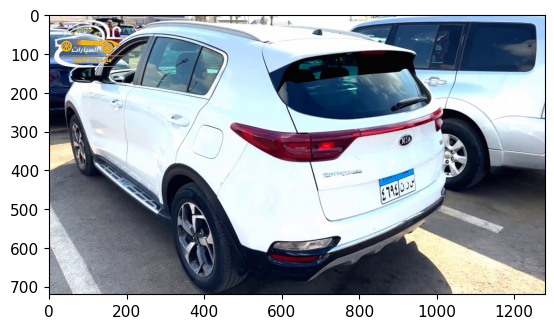

In [86]:
show_image_and_final_result(images)

[['ر', 'ي', 'و'], '٣٨٥', 'القاهرة']


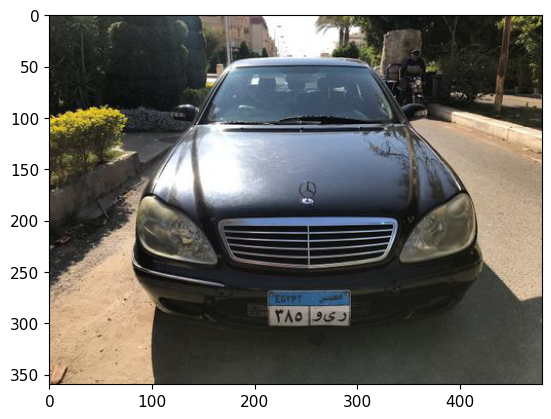

In [88]:
show_image_and_final_result(images)

[['ق', 'م'], '٦١٨٢', 'الجيزة']


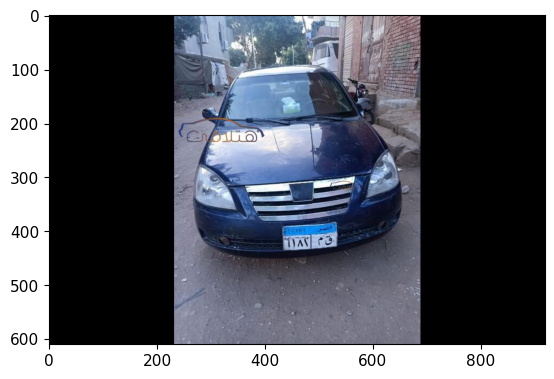

In [91]:
show_image_and_final_result(images)

[['ي', 'ن'], '٩٦٩٢', 'الجيزة']


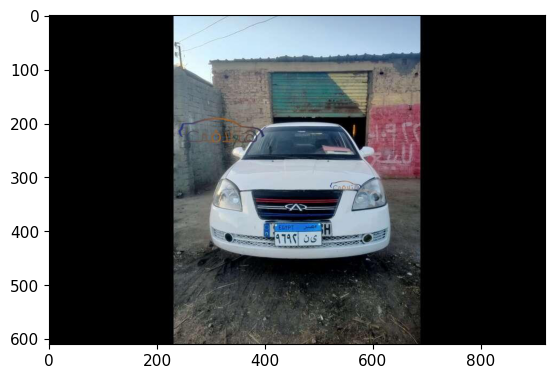

In [93]:
show_image_and_final_result(images)

[['ف', 'د', 'ر'], '١٣٥٢', 'الفيوم']


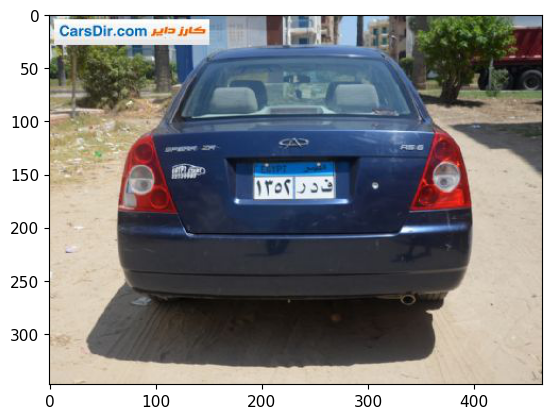

In [95]:
show_image_and_final_result(images)

[['ص', 'ط', 'ق'], '٧٦٩', 'القاهرة']


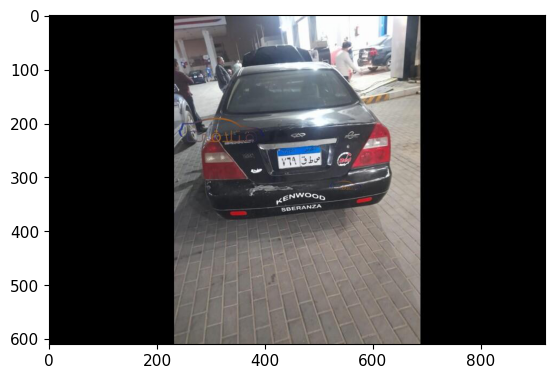

In [98]:
show_image_and_final_result(images)

[['أ', 'ج', 'د'], '٦٨٤٦', 'القاهرة']


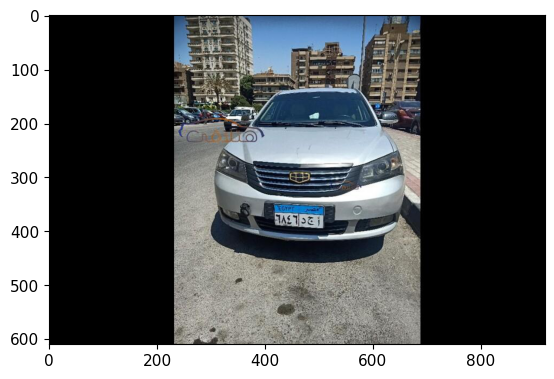

In [100]:
show_image_and_final_result(images)

[['س', 'ه', 'ي'], '٢٥٦٣', 'الإسكندرية']


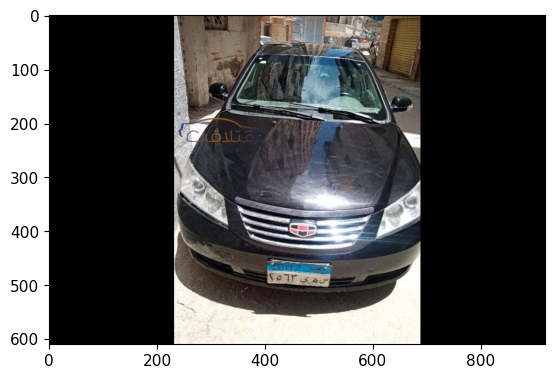

In [102]:
show_image_and_final_result(images)

[['ع', 'م', 'أ'], '٥٣٨٢', 'الغربية']


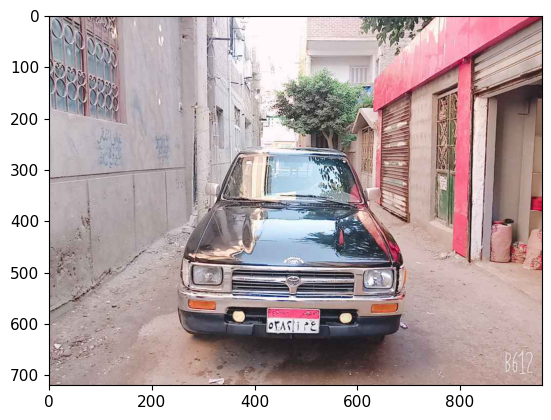

In [104]:
show_image_and_final_result(images)

[['م', 'ن', 'ر'], '٦٢٥٤', 'المنوفية']


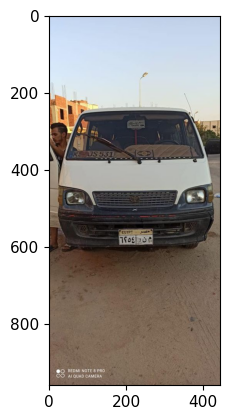

In [106]:
show_image_and_final_result(images)

[['ر', 'و', 'ي'], '٤٨٥١', 'الشرقية']


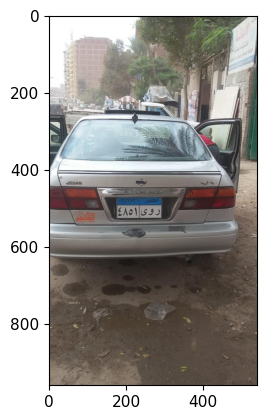

In [108]:
show_image_and_final_result(images)

[['د', 'ف', 'ق'], '٩٤٣٥', 'الدقهلية']


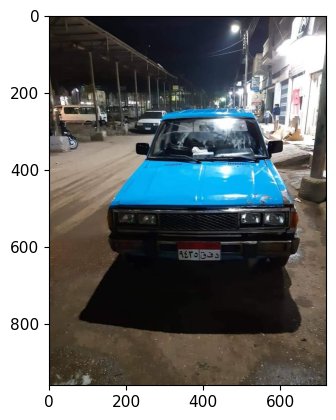

In [110]:
show_image_and_final_result(images)

[['ق', 'ه', 'ع'], '٥٨٤٧', 'القليوبية']


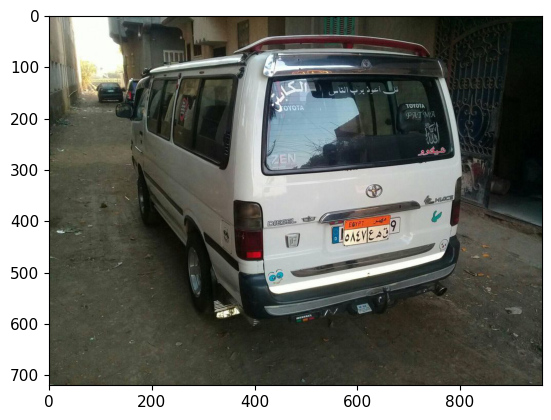

In [112]:
show_image_and_final_result(images)

[['ب١٦'], '٦١٤٨', 'شرطة']


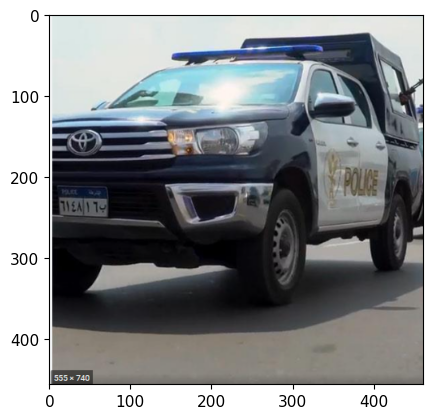

In [114]:
show_image_and_final_result(images)

[['ب١٤'], '٧٧٧٤', 'شرطة']


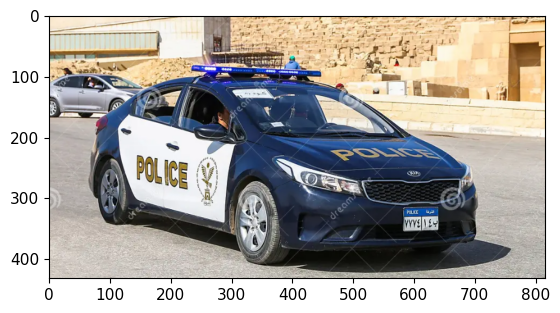

In [116]:
show_image_and_final_result(images)